<a href="https://colab.research.google.com/github/tricktx/Ciencia-de-Dados/blob/main/1%C2%B0_Projeto_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Startups+in+2021+end.csv')
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
df.shape

(936, 8)

In [ ]:
df.rename(columns = {
    'Unnamed: 0' : 'ID',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valuation (R$)',
    'Date Joined' : 'Data de entrada',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Segmento',
    'Select Investors' : 'Investidores'
}, inplace=True)
df.head()

,ID,Empresa,Valuation (R$),Data de entrada,País,Cidade,Segmento,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               936 non-null    int64 
 1   Empresa          936 non-null    object
 2   Valuation (R$)   936 non-null    object
 3   Data de entrada  936 non-null    object
 4   País             936 non-null    object
 5   Cidade           921 non-null    object
 6   Segmento         936 non-null    object
 7   Investidores     935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
df.isnull().sum()

ID                  0
Empresa             0
Valuation (R$)      0
Data de entrada     0
País                0
Cidade             15
Segmento            0
Investidores        1
dtype: int64

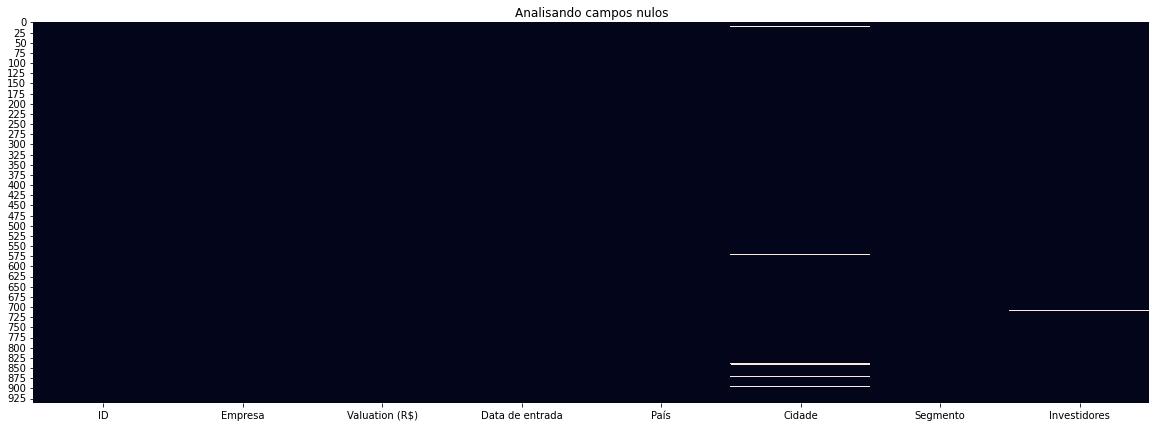

In [ ]:
# 1° Gráfico
plt.figure(figsize=(20,7)) #Dimensões do gráfico
plt.title('Analisando campos nulos') #Título do Gráfico
sns.heatmap(df.isnull(), cbar=False); #cbar tira a barrinha do lado.

In [ ]:
#Valores únicos
df.nunique()

ID                 936
Empresa            935
Valuation (R$)     192
Data de entrada    589
País                47
Cidade             239
Segmento            17
Investidores       920
dtype: int64

In [ ]:
#Quantidade de setores na coluna Segmento
df['Segmento'].nunique()

17

In [ ]:
#Quantidade de setores na coluna Segmento
df['Segmento'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
#Contagem de setores em valores únicos por rank
df['Segmento'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Segmento, dtype: int64

In [ ]:
#Contagem de setores em valores únicos por rank em casa decimal. 
df['Segmento'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Segmento, dtype: float64

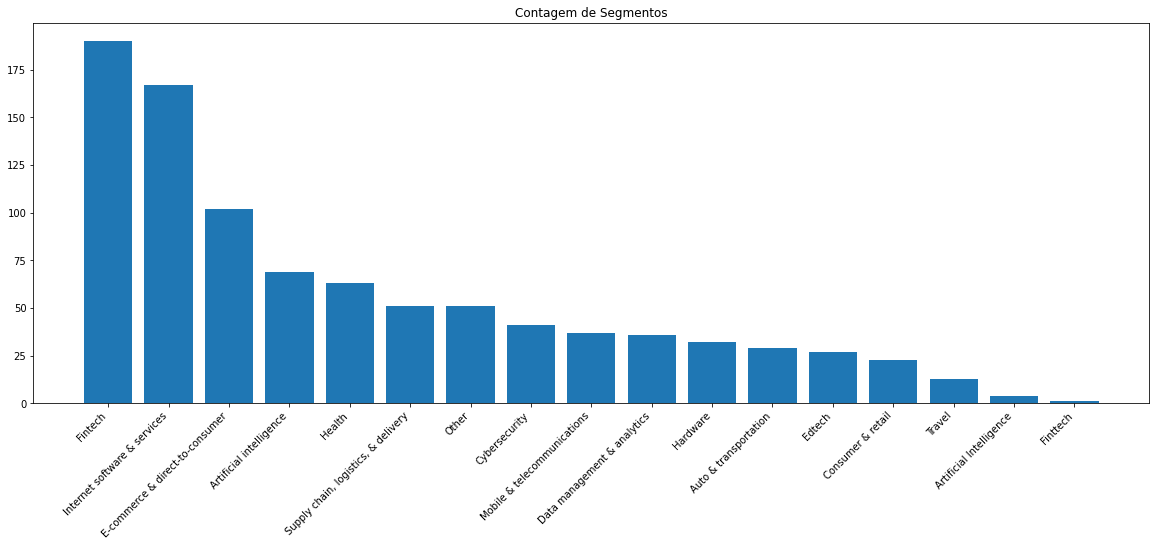

In [ ]:
plt.figure(figsize=(20,7)) #Dimensões do gráfico
plt.title('Contagem de Segmentos') # Título do gráfico
plt.bar(df['Segmento'].value_counts().index, df['Segmento'].value_counts()) # função para plotar o gráfico 
# Index para trazer a lista
plt.xticks(rotation=45, ha='right'); # Rotação de 45 graus na lista, invertendo ela para a direita.

In [ ]:
df.head()

,ID,Empresa,Valuation (R$),Data de entrada,País,Cidade,Segmento,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
df['País'].value_counts() # value_counts = Quantidade palavras repetidas na coluna

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [ ]:
df.pizza = round(df['País'].value_counts(normalize=True)*100,2) # normalize=True == porcentagem
                                                             # round = quantidade de casas decimais - Podendo colocar quantas casas quiser.
                                                            # value_counts = Quantidade palavras repetidas na coluna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df.pizza

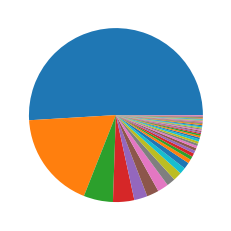

In [ ]:
plt.pie(df.pizza);

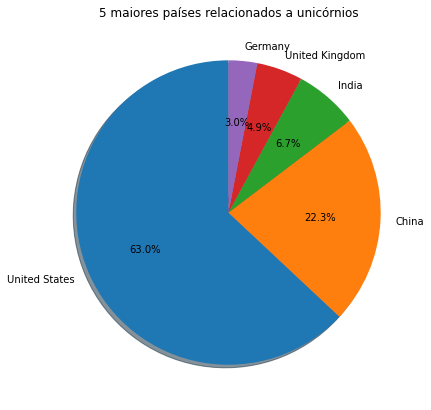

In [ ]:
plt.figure(figsize=(20,7)) #Dimensões do gráfico
plt.title('5 maiores países relacionados a unicórnios')
plt.pie(
    df.pizza.head(5), #Principal parâmetro
    labels = df.pizza.index[0:5], # Labels = colocar os nomes ao lado do gráfico
    shadow=True,
    startangle=90, # Direção do gráfico 
    autopct='%1.1f%%' #Plotar os dados dentro do gráfico, f significa que é um float
);

In [ ]:
df.head()

,ID,Empresa,Valuation (R$),Data de entrada,País,Cidade,Segmento,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#Convertendo data
df['Data de entrada'] = pd.to_datetime(df['Data de entrada'])
df['Data de entrada'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de entrada, dtype: datetime64[ns]

In [ ]:
# criando coluna de dia, mês e ano.

df['Dia'] = pd.DatetimeIndex(df['Data de entrada']).day
df['mês'] = pd.DatetimeIndex(df['Data de entrada']).month
df['ano'] = pd.DatetimeIndex(df['Data de entrada']).year
df

,ID,Empresa,Valuation (R$),Data de entrada,País,Cidade,Segmento,Investidores,Dia,mês,ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",7,4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1,12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",23,1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",8,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,2021-12-06,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ...",6,12,2021
932,932,Anyscale,$1,2021-12-07,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation...",7,12,2021
933,933,Iodine Software,$1,2021-12-01,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S...",1,12,2021
934,934,ReliaQuest,$1,2021-12-01,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures",1,12,2021


In [ ]:
# Montando uma tablea analitica apenas com as colunas que desejo
df.analise = df.groupby( by= ['País', 'ano', 'mês', 'Segmento', 'Empresa']).count()['ID'].reset_index()
df.analise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,País,ano,mês,Segmento,Empresa,ID
0,Argentina,2021,8,Fintech,Uala,1
1,Australia,2018,1,Internet software & services,Canva,1
2,Australia,2019,3,Fintech,Airwallex,1
3,Australia,2021,5,Internet software & services,SafetyCulture,1
4,Australia,2021,7,Internet software & services,Culture Amp,1
...,...,...,...,...,...,...
931,United States,2021,12,E-commerce & direct-to-consumer,Jokr,1
932,United States,2021,12,Fintech,AgentSync,1
933,United States,2021,12,Internet software & services,YipitData,1
934,"United States,",2021,9,Health,TrialSpark,1


In [ ]:
# Trouxe o loc para achar apenas um parâmetro dentro da base de dados, nesse caso, o Brazil
df.analise.loc[df.analise['País'] == 'Brazil']

,País,ano,mês,Segmento,Empresa,ID
12,Brazil,2018,3,Fintech,Nubank,1
13,Brazil,2018,7,Mobile & telecommunications,Movile,1
14,Brazil,2018,11,"Supply chain, logistics, & delivery",iFood,1
15,Brazil,2019,6,"Supply chain, logistics, & delivery",Loggi,1
16,Brazil,2019,9,E-commerce & direct-to-consumer,QuintoAndar,1
17,Brazil,2019,10,Fintech,EBANX,1
18,Brazil,2019,12,Other,Wildlife Studios,1
19,Brazil,2020,1,E-commerce & direct-to-consumer,Loft,1
20,Brazil,2020,12,Fintech,C6 Bank,1
21,Brazil,2020,12,Fintech,Creditas,1


In [ ]:
# Replace (Usado para substituir trechos na string) para alterar 

df['Valuation (R$)'] = df['Valuation (R$)'].replace('$', '')
df.head()


,ID,Empresa,Valuation (R$),Data de entrada,País,Cidade,Segmento,Investidores,Dia,mês,ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",7,4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1,12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",23,1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",8,1,2018


In [ ]:
df.pais = df.groupby (by = ['País']).sum()['Valuation (R$)'].reset_index()
df.pais.head()

,País,Valuation (R$)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
df.valor = df.pais.sort_values('Valuation (R$)', ascending=False)

In [ ]:
df.valor.head()

,País,Valuation (R$)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


<function matplotlib.pyplot.show>

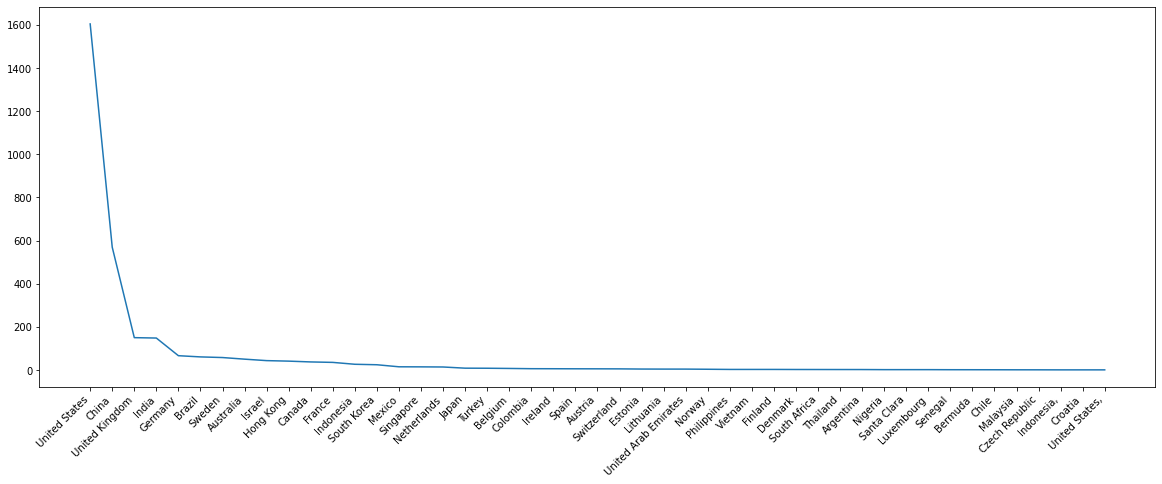

In [ ]:
plt.figure(figsize=(20,7))
# plt.title('Analise dos Valores dos unicórnios por país')
plt.plot(df.valor['País'], df.valor['Valuation (R$)'])
plt.xticks(rotation = 45, ha = 'right')
plt.show

<function matplotlib.pyplot.show>

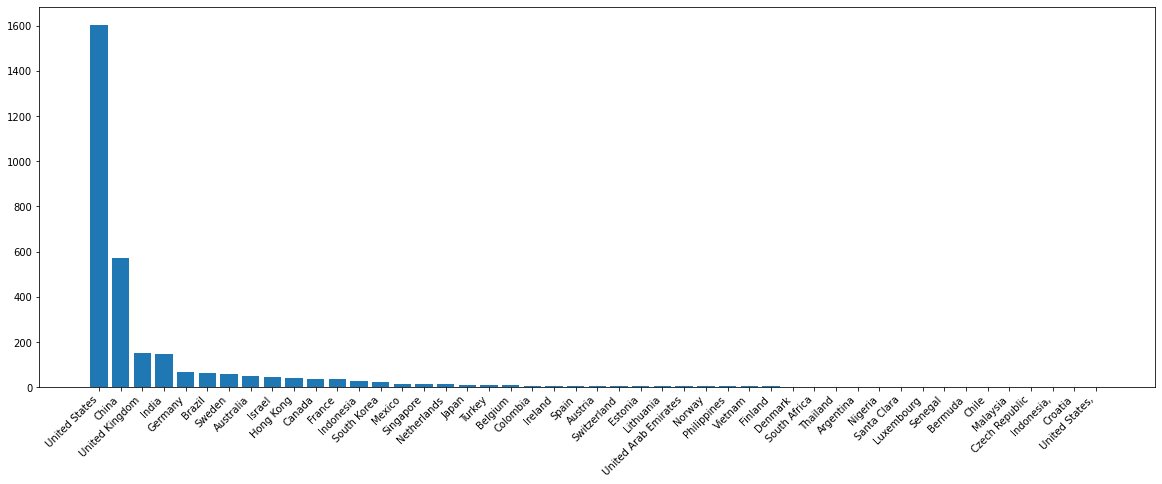

In [ ]:
plt.figure(figsize=(20,7))
# plt.title('Analise dos Valores dos unicórnios por país')
plt.bar(df.valor['País'], df.valor['Valuation (R$)'])
plt.xticks(rotation = 45, ha = 'right')
plt.show